**7/10_課題07**  
1922076 南 昂汰 G4

----
## 課題7-1. 上記の条件で、ノイズの乗った波に対し、周波数2,000Hz以上を除去した場合の波と、周波数1,000Hz以上を除去した場合のグラフを描き、元のグラフと合わせて3つのグラフの画像を提出せよ。

F が何を表しているのか、よくよく見直してみよう。

負の周波数も、対応するところは残しておかないとおかしくなる。



In [179]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.lines as lines
import numpy as np
from matplotlib.animation import ArtistAnimation
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
from IPython.display import Audio
import random
import sympy as sym
sym.init_printing()

In [ ]:
N = 1024
dt = 0.001
f1, f2 = 50, 120

t = np.arange(0, N*dt, dt)
x = 1.5*np.sin(2*np.pi*f1*t) + np.sin(2*np.pi*f2*t) + 3

fig, ax = plt.subplots()
ax.plot(t, x)
ax.set_xlabel("Time [s]")
ax.set_ylabel("Signal")
ax.grid()
plt.show()

In [ ]:
F = np.fft.fft(x)
freq = np.fft.fftfreq(N, d=dt)

fig, ax = plt.subplots(nrows=3, sharex=True, figsize=(6,6))
ax[0].plot(F.real, label="Real part")
ax[0].legend()
ax[0].grid()
ax[1].plot(F.imag, label="Imaginary part")
ax[1].legend()
ax[1].grid()
ax[2].plot(freq, label="Frequency")
ax[2].legend()
ax[2].set_xlabel("Number of data")
ax[2].grid()
plt.show()

In [182]:
def plot_fft(x,dt,N):
    F = np.fft.fft(x)
    freq = np.fft.fftfreq(N, d=dt)
    Amp = np.abs(F/(N/2))
    fig, ax = plt.subplots()
    ax.plot(freq[1:int(N/2)], Amp[1:int(N/2)])
    ax.set_xlabel("Freqency [Hz]")
    ax.set_ylabel("Amplitude")
    ax.grid()
    plt.show() 

In [ ]:
duration = 1
fs = 16000
base = 440
f0s = [880, 1320, 1760]

wave = np.sin(base * 2 * np.pi * np.linspace(0, duration, duration * 16000))

html = "<table><tr><th>Freq</th><th>音声</th></tr>"
for f0 in f0s:
    wave += np.sin(f0 * 2 * np.pi * np.linspace(0, duration, duration * 16000))

audio_obj = Audio(data=wave, rate=fs)
html += """
<tr><td>%s Hz</td><td>
    <audio controls>
        <source src="%s" type="audio/wav" volume="0.5">
    </audio></td>
</tr>
""" % ("mixed", audio_obj.src_attr())

html += "</table>"

HTML(html)

In [ ]:
N = duration * fs
dt = 1/ fs

plot_fft(wave,dt,N)

In [185]:
def return_fft(x,dt,N):
    F = np.fft.fft(x)
    freq = np.fft.fftfreq(N, d=dt)
    Amp = np.abs(F/(N/2))
    return(F, freq, Amp)

def return_ifft(F,N):
    f_time = np.fft.ifft(F,N).real
    return f_time  

In [ ]:
wave = x
audio_obj = Audio(data=wave, rate=fs)
html = "<table><tr><th>Freq</th><th>音声</th></tr>"
html += """
<tr><td>%s</td><td>
    <audio controls>
        <source src="%s" type="audio/wav">
    </audio></td>
</tr>
""" % ("noised", audio_obj.src_attr())

html += "</table>"
HTML(html)

In [187]:
N = 1024 * 10
dt = 0.0001
f1, f2 = 220, 440

t = np.arange(0, N*dt, dt)
x = 1.5*np.sin(2*np.pi*f1*t) + np.sin(2*np.pi*f2*t) + 3

for i in range(len(x)):
    x[i] += random.random()- 0.5

F, F_freq, F_Amp = return_fft(x,dt,N)

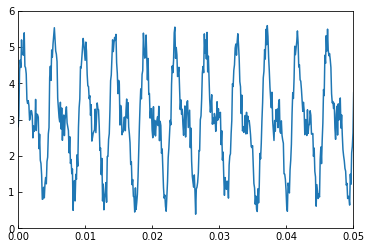

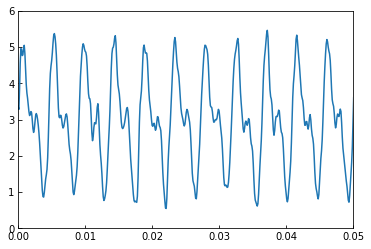

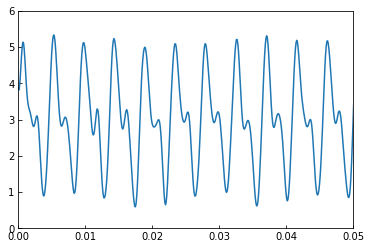

In [188]:
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(1,1,1)
ax.plot(t, x)
ax.axis([-0.0,0.05,-0.0,6.0])
plt.show()



F1 = F.copy()
# 周波数（F_freq[i])が2000以上の時
for i in range(len(F_freq)):
    if np.abs(F_freq[i]) >= 2000:
        F1[i] = 0
result_wave = return_ifft(F1,N)
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(1,1,1) 
ax.plot(t, result_wave)
ax.axis([-0.0,0.05,-0.0,6.0])
plt.show()



F2 = F.copy()
# 周波数（F_freq[i])が1000以上の時
for i in range(len(F_freq)):
    if np.abs(F_freq[i]) >= 1000:
        F2[i] = 0
result_wave2 = return_ifft(F2,N)
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(1,1,1) 
ax.plot(t, result_wave2)
ax.axis([-0.0,0.05,-0.0,6.0])
plt.show()

## 課題7-2. sin(x)の、x=1付近でのテイラー展開を、n=1から10次項まで求めた場合のグラフを、アニメーションで描いて動画で提出せよ
- 途中増えないけどそれでよし


In [190]:
cal_x = np.arange(-10.0, 10.1, 0.1)
cal_y = np.sin(cal_x)

x = sym.Symbol('x')

sol = []
a = 1
for i in range(6):
    taylor = sym.series(sym.sin(x), x=x, x0=a, n=i+2).removeO()
    taylor_y = sym.lambdify(x, taylor, 'numpy')
    sol.append(taylor_y(cal_x))

plt.rcParams['font.size'] = 14
plt.rcParams['font.family'] = 'Times New Roman'

plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.yaxis.set_ticks_position('both')
ax1.xaxis.set_ticks_position('both')

ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_xlim(-np.pi*2, np.pi*2)
ax1.set_ylim(-2, 2)

ax1.plot(cal_x, cal_y, label='Theory', lw=3, color='black')
artist_list = []
for j in range(len(sol)):
    ax2 = ax1.plot(cal_x, sol[j])
    artist_list.append(ax2)

fig.tight_layout()

ani = ArtistAnimation(fig, artist_list, interval= 1000)
plt.legend()
plt.close()
display(HTML(ani.to_jshtml()))
ani.save('./data_and_math_7_2.mp4', writer="ffmpeg")